In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
from pprint import pprint
from datetime import datetime
#bls_key = 'a221097743424e50a9640418bcff10bb'

#initialize the new Client
#data =dpb.data('165CE351-F1E7-4289-966F-C6002ACBD851')


In [2]:
saemp69 = pd.read_csv('SAEMP25S__ALL_AREAS_1969_2001.csv')
saemp98 = pd.read_csv('SAEMP25N__ALL_AREAS_1998_2019.csv')

In [3]:
desc69 = saemp69['Description']
desc69 = desc69.astype(str)
desc98 = saemp98['Description']
desc98 = desc98.astype(str)

In [4]:
desc69 = pd.Series([x.strip() for x in desc69])
desc98 = pd.Series([x.strip() for x in desc98])

In [5]:
saemp69_c = saemp69.copy().copy()
saemp98_c = saemp98.copy().copy()

In [6]:
saemp69_c['Description']=saemp69_c['Description'].str.strip()
saemp98_c['Description'] = saemp98_c['Description'].str.strip()

In [7]:
saemp69_c = saemp69_c.replace({'Description':{'Apparel and accessory stores':'Clothing and clothing accessories stores',
                        'Fishing':'Forestry, fishing, and related activities',
                        'Forestry':'Forestry, fishing, and related activities',
                        'Forestry and fishing':'Forestry, fishing, and related activities',
                        'Insurance carriers':'Insurance carriers and related activities',
                        'Transportation by air':'Air transportation',
                        'Rubber and miscellaneous plastics products':'Plastics and rubber products manufacturing',
                        'Food and kindred products':'Food manufacturing',
                        'Apparel and other textile products':'Apparel manufacturing',
                        'Amusement and recreation services':'Amusement, gambling, and recreation industries',
                        'Building materials and garden equipment':'Building material and garden equipment and supplies dealers',
                        'Motion pictures':'Motion picture and sound recording industries',
                        'Eating and drinking places':'Food services and drinking places',
                        'Special trade contractors':'Specialty trade contractors',
                        'Museums, botanical, zoological gardens':'Museums, historical sites, and similar institutions',
                        'Petroleum and coal products':'Petroleum and coal products manufacturing',
                        'Paper and allied products':'Paper manufacturing',
                        'Fabricated metal products':'Fabricated metal product manufacturing',
                        'Nonmetallic minerals, except fuels':'Nonmetallic mineral product manufacturing',
                        'Agricultural services':'Farm employment',
                        'Agricultural services, forestry, and fishing':'Forestry, fishing, and related activities',
                        'Automotive dealers and service stations':'Motor vehicle and parts dealers',
                        'Automotive repair, services, and parking':'Repair and maintenance',
                        'Business services':'Securities, commodity contracts, and other financial investments and related activities',
                        'Chemicals and allied products':'Chemical manufacturing',
                        'Coal mining':'Mining (except oil and gas)',
                        'Combined real estate, insurance, etc. 4/':'Real estate and rental and leasing',
                        'Communications':'Other information services 3/',
                        'Depository and nondepository institutions':'Funds, trusts, and other financial vehicles',
                        'Electric, gas, and sanitary services':'Utilities',
                        'Electronic and other electric equipment':'Electrical equipment, appliance, and component manufacturing',
                        'Engineering and management services 6/':'Professional, scientific, and technical services',
                        'Finance, insurance, and real estate':'Finance and insurance',
                        'Food stores':'Food and beverage stores',
                        'Furniture and fixtures':'Furniture and related product manufacturing',
                        'General building contractors':'Construction of buildings',
                        'Health services':'Ambulatory health care services',
                        'Heavy construction contractors':'Heavy and civil engineering construction',
                        'Holding and other investment offices':'Securities, commodity contracts, and other financial investments and related activities',
                        'Home furniture and furnishings stores':'Furniture and home furnishings stores',
                        'Hotels and other lodging places':'Accommodation',
                        'Industrial machinery and equipment':'Machinery manufacturing',
                        'Instruments and related products':'Miscellaneous manufacturing',
                        'Insurance agents, brokers, and services':'Insurance carriers and related activities',
                        'Leather and leather products':'Leather and allied product manufacturing',
                        'Legal services':'Professional, scientific, and technical services',
                        'Local and interurban passenger transit':'Transit and ground passenger transportation',
                        'Lumber and wood products':'Wood product manufacturing',
                        'Membership organizations':'Amusement, gambling, and recreation industries',
                        'Metal mining':'Mining (except oil and gas)',
                        'Mining':'Mining (except oil and gas)',
                        'Miscellaneous manufacturing industries':'Miscellaneous manufacturing',
                        'Miscellaneous manufacturing|':'Miscellaneous manufacturing',
                        'Miscellaneous repair services':'Repair and maintenance',
                        'Miscellaneous retail':'Miscellaneous store retailers',
                        'Miscellaneous services':'Miscellaneous store retailers',
                        'Motor vehicles and equipment':'Motor vehicle and parts dealers',
                        'Ordnance 3/':'Local government',
                        'Other finance, insurance, and real estate':'Finance and insurance',
                        'Other transportation':'Support activities for transportation',
                        'Other transportation equipment':'Other transportation equipment manufacturing',
                        'Personal services':'Personal and laundry services',
                        'Pipelines, except natural gas':'Pipeline transportation',
                        'Primary metal industries':'Primary metal manufacturing',
                        'Printing and publishing':'Printing and related support activities',
                        'Railroad transportation':'Rail transportation',
                        'Security and commodity brokers':'Securities, commodity contracts, and other financial investments and related activities',
                        'Services':'Other services (except government and government enterprises)',
                        'Social services 5/':'Social assistance',
                        'Stone, clay, and glass products':'Nonmetallic mineral product manufacturing',
                        'Textile mill products':'Textile product mills',
                        'Textile product mills #  Textile mills':'Textile product mills',
                        'Tobacco products':'Beverage and tobacco product manufacturing',
                        'Transportation':'Support activities for transportation',
                        'Transportation and public utilities':'Pipeline transportation',
                        'Transportation services':'Support activities for transportation',
                        'Trucking and warehousing':'Transportation and warehousing'}})

In [8]:
saemp98_c = saemp98_c.drop(['1998','1999','2000','2001','TableName'],axis = 1)
saemp69_c = saemp69_c.drop('TableName',axis = 1)
saemp69_c=saemp69_c.astype(object)
saemp98_c=saemp98_c.astype(object)

In [9]:
full_merged = pd.merge(saemp69_c.dropna(),saemp98_c.dropna(),how = 'outer',on =['GeoFIPS', 'GeoName', 'Region', 'LineCode', 'IndustryClassification', 'Description','Unit'])

In [10]:
full_merged_1 = full_merged.copy()

In [11]:
full_merged_1 = full_merged_1.replace({'Description': {'Accommodation':'Accommodation and food services',
                                                  'Construction of buildings':'Construction',
                                                  'Forestry and logging':'Forestry, fishing, and related activities',
                                                      'Fishing, hunting and trapping':'Forestry, fishing, and related activities',
                                                      'Mining (except oil and gas)':'Mining, quarrying, and oil and gas extraction',
                                                      'Administrative and support services':'Administrative and support and waste management and remediation services',
                                                       'Waste management and remediation services':'Administrative and support and waste management and remediation services',
                                                      'Amusement, gambling, and recreation industries':'Arts, entertainment, and recreation',
                                                      'Performing arts, spectator sports, and related industries':'Arts, entertainment, and recreation'}})

In [12]:
#maybe build function for anystate
Alabama_Ex = full_merged_1[(full_merged_1['GeoName'] == 'Alabama')]
California_ex = full_merged_1[full_merged_1['GeoName'] == 'California']
NewYork_ex = full_merged_1[full_merged_1['GeoName'] == 'New York']
Texas_ex = full_merged_1[full_merged_1['GeoName'] == 'Texas']
Illinois_ex = full_merged_1[full_merged_1['GeoName'] == 'Illinois']
state_list = [Alabama_Ex,California_ex,NewYork_ex,Texas_ex,Illinois_ex]

In [13]:
ny_test = (NewYork_ex[NewYork_ex['Description'] == 'Total employment (number of jobs)'].stack()).reset_index()[['level_1',0]].loc[lambda x: x.index > 6].astype(int)

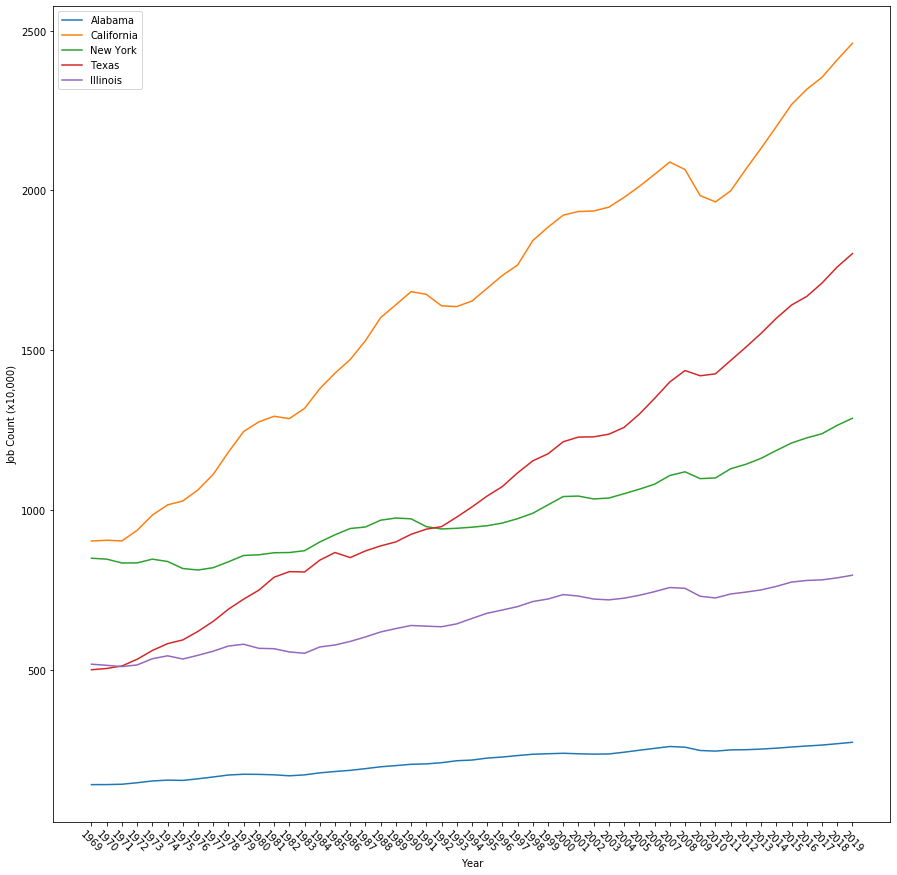

In [14]:
#job totals per state over time
fig, ax = plt.subplots(figsize = (15,15))
names = []
for state in state_list:
    names.append(state.GeoName.unique()[0])
    
    emp_df = state[state['Description'] == 'Total employment (number of jobs)'].stack().reset_index()[['level_1',0]].loc[lambda x: x.index > 6].astype(int)
    ax.plot(emp_df['level_1'],(emp_df[0]/10000))
ax.tick_params(axis = 'x',labelrotation=-45)
ax.set_xticks(range(1969,2020))
ax.set_xlabel('Year')
ax.set_ylabel('Job Count (x10,000)')
ax.legend(names)

In [15]:
#creates minimum wage df for the select states; specifically set wages changes for each year
state_mw = pd.read_csv('StateMinimumWage_Changes.csv')
our_5 = state_mw[(state_mw['State'] == 'Alabama') | (state_mw['State'] == 'New York') | (state_mw['State'] == 'Illinois') | (state_mw['State'] == 'Texas') | (state_mw['State'] == 'California')]
our_5 = our_5[['State','year','mw']]
our_5 = our_5.set_index('year')

Text(0.5, 1.0, 'Employment Availability and Wage Sensitivity')

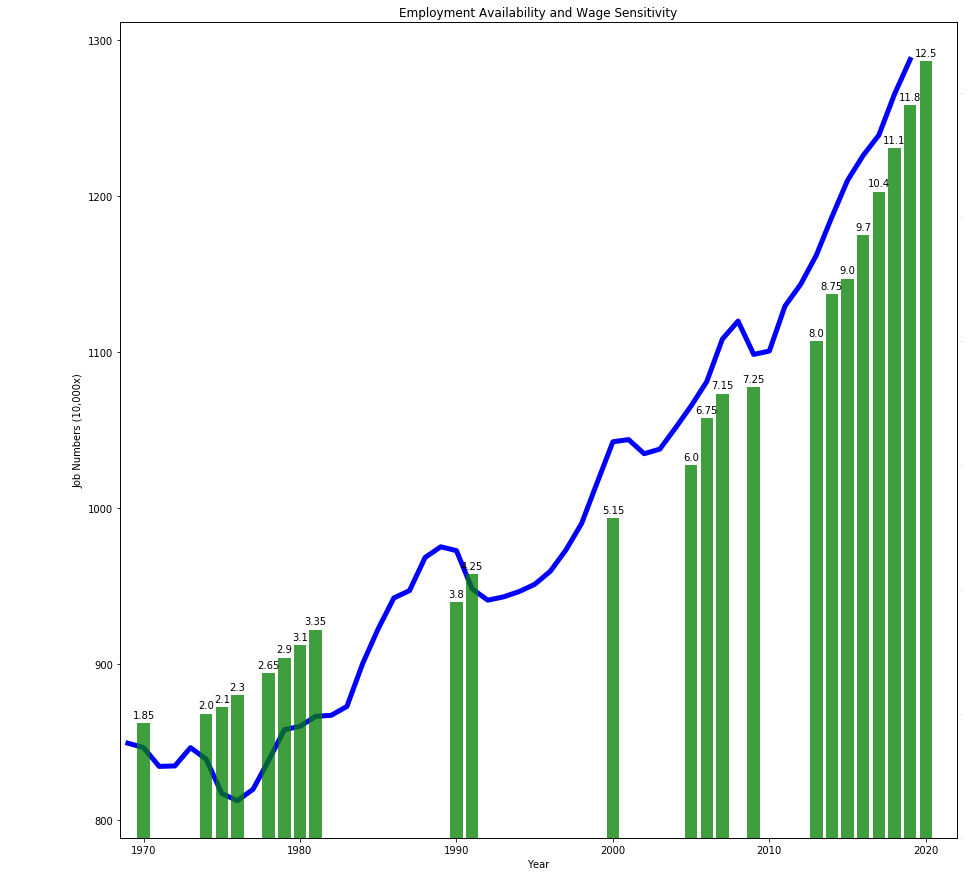

In [16]:
#needs work cleaning primary/secondary y-axis and applying legend
#one of these for each state?
fig1,ax1 = plt.subplots(figsize = (15,15))
ax2 = ax1.twinx()
ax2.bar(height = our_5[our_5['State'] == 'New York']['mw'],x =our_5[our_5['State'] == 'New York'].index,color = 'green', alpha = 0.5)
ax1.plot(ny_test['level_1'],ny_test[0]/10000, color = 'b',lw = 5)

ax1.set_xlim(1968.5,2022)
ax2.tick_params(axis = 'y',labelsize = 0,length = 0)
#Copied and adjusted from matplotlib documentation
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(ax2.bar(height = our_5[our_5['State'] == 'New York']['mw'],x =our_5[our_5['State'] == 'New York'].index,color = 'green', alpha = 0.5))
ax1.set_ylabel('Job Numbers (10,000x)')
ax1.set_xlabel('Year')
plt.title('Employment Availability and Wage Sensitivity')

In [17]:

def build_it(state,domain = (1974,2022)):
    fig,ax1 = plt.subplots(figsize = (15,15))
    state_name = state.GeoName.unique()[0]
    emp_df = state[state['Description'] == 'Total employment (number of jobs)'].stack().reset_index()[['level_1',0]].loc[lambda x: x.index > 6].astype(int)
    ax2 = ax1.twinx()
    
    ax1.plot(emp_df['level_1'],emp_df[0]/10000, color = 'b',lw = 5)

    ax1.set_xlim(domain)
    ax2.tick_params(axis = 'y',labelsize = 0,length = 0)
    #Copied and adjusted from matplotlib documentation
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax2.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    autolabel(ax2.bar(height = our_5[our_5['State'] == state_name]['mw'],x =our_5[our_5['State'] == state_name].index,color = 'green', alpha = 0.5))
    ax1.set_ylabel('Job Numbers (10,000x)')
    ax1.set_xlabel('Year')
    plt.title('Employment Availability and Wage Sensitivity')

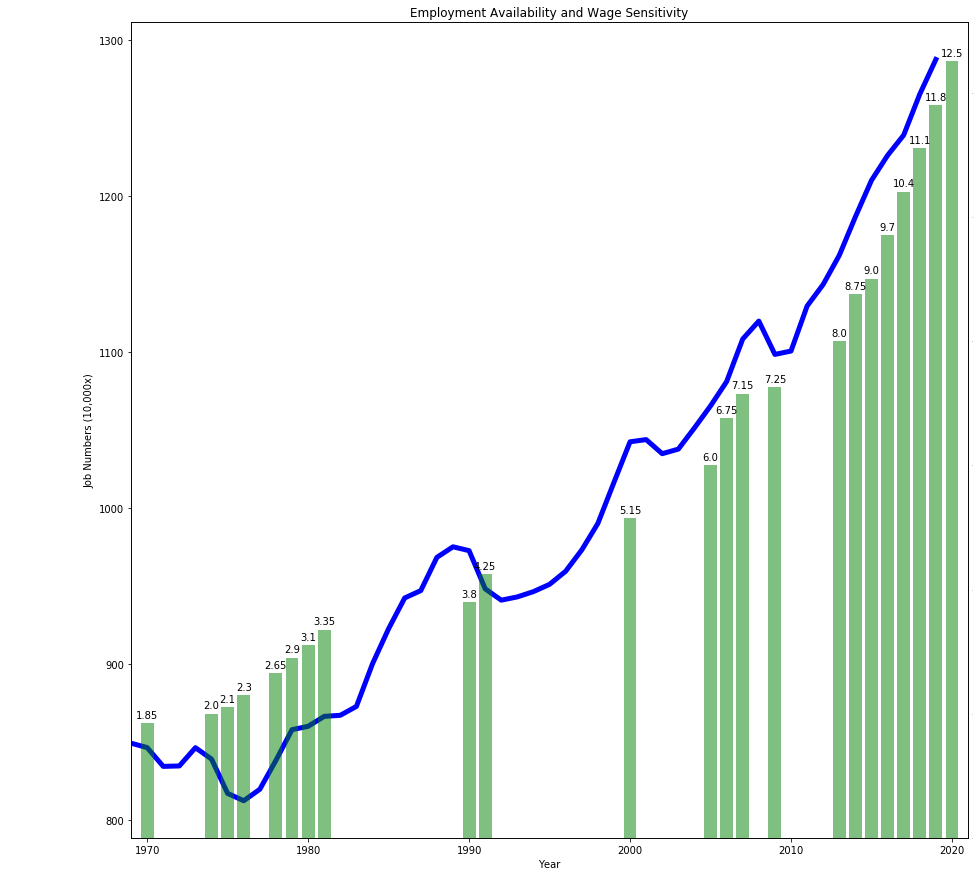

In [18]:
build_it(NewYork_ex,domain = (1969,2021))

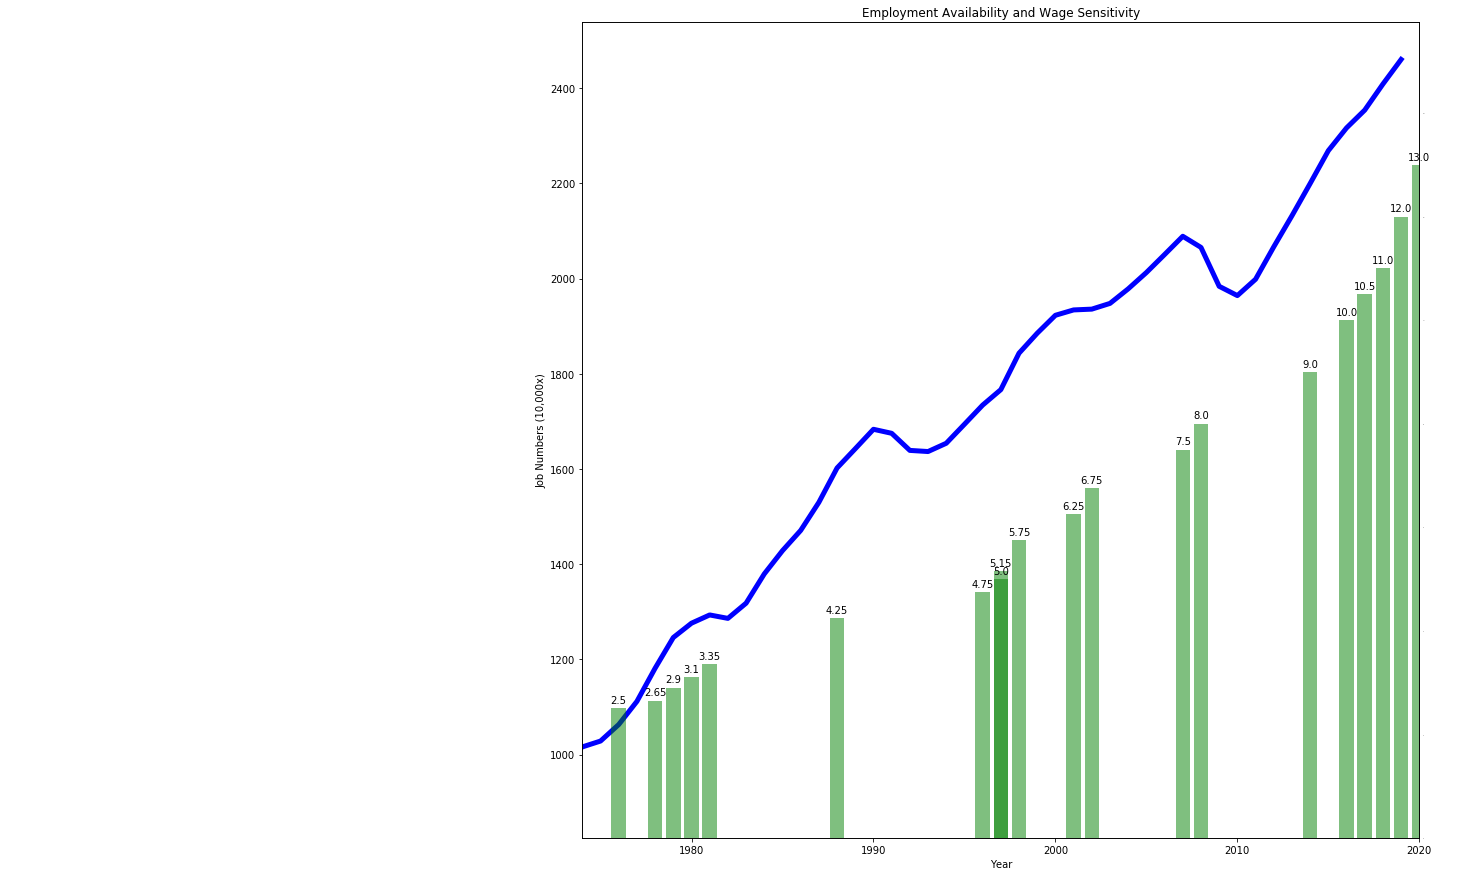

In [19]:
build_it(California_ex,domain =(1974,2020))

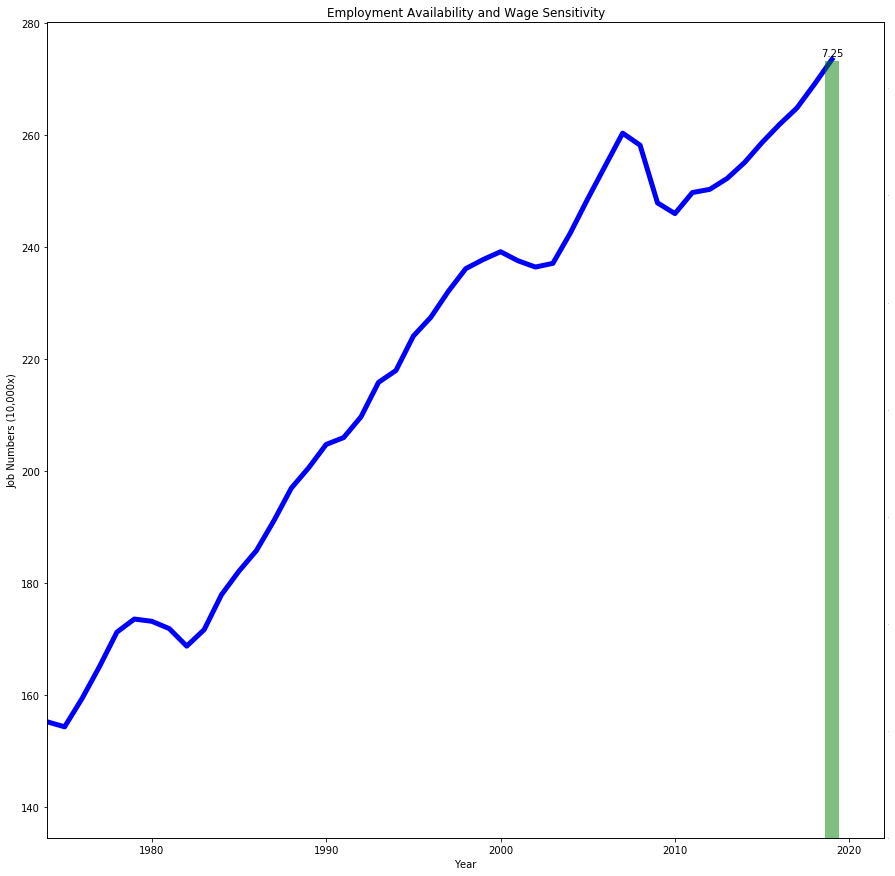

In [20]:
build_it(Alabama_Ex)

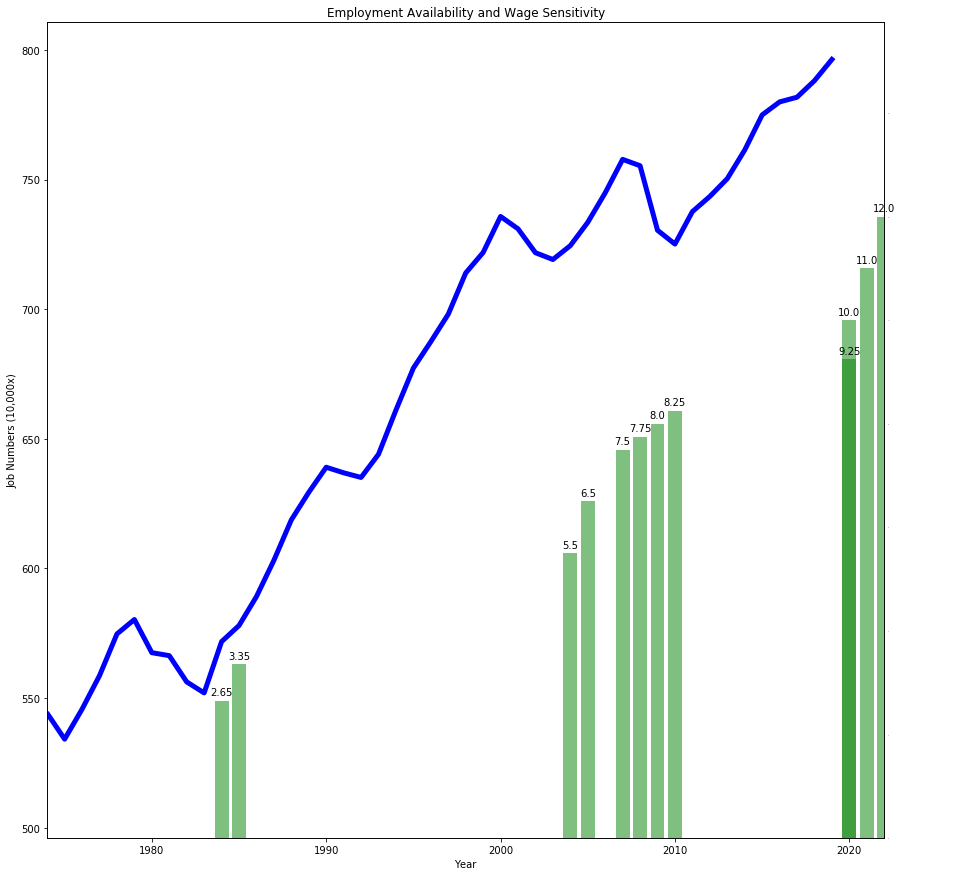

In [21]:
build_it(Illinois_ex)

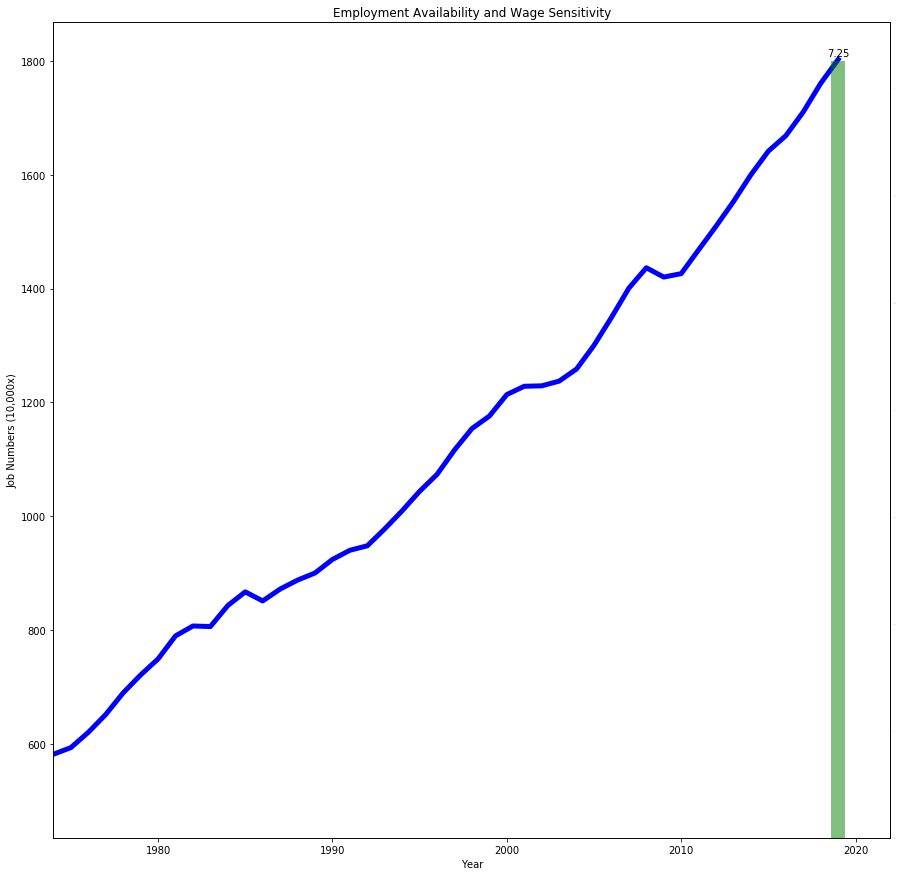

In [22]:
build_it(Texas_ex)